In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [230]:
df.shape


(13320, 9)

In [231]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [232]:
df.drop(['availability','society','balcony','area_type'],axis=1,inplace=True)

In [233]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [234]:
df.dropna(inplace=True)

In [235]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [236]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [237]:
df.shape

(13246, 5)

In [238]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [239]:
def bedroom_correct(x):
    b=x.split(' ')
    c=int(b[0])
    return c

In [240]:
bedroom_correct('4 Bedroom')

4

In [241]:
df['size']=df['size'].apply(bedroom_correct)

In [242]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [243]:
df.rename(columns={'size':'bhk'},inplace=True)

In [244]:
df.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [245]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [246]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [247]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [248]:
is_float('100-120')

False

In [249]:
is_float('200')

True

In [250]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,bhk,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [251]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [252]:
df.dtypes

location       object
bhk             int64
total_sqft     object
bath          float64
price         float64
dtype: object

In [253]:
df.head(20)

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
5,Whitefield,2,1170,2.0,38.00
6,Old Airport Road,4,2732,4.0,204.00
7,Rajaji Nagar,4,3300,4.0,600.00
8,Marathahalli,3,1310,3.0,63.25
9,Gandhi Bazar,6,1020,6.0,370.00


In [254]:
def sqft(x):
    b=x.split('-')
    if len(b)==2:
        return((float(b[0])+float(b[1]))/2)
    try:
        return(float(x))
    except:
        return None


In [255]:
sqft('1232') #Returns theb same no.

1232.0

In [256]:
sqft('1150-1134') #Returns avg of both

1142.0

In [257]:
sqft('Yelanka') #Returns None

In [258]:
df['total_sqft']=df['total_sqft'].apply(sqft)

In [259]:
df.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [260]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [261]:
df.loc[30]

location      Yelahanka
bhk                   4
total_sqft       2475.0
bath                4.0
price             186.0
Name: 30, dtype: object

In [262]:
df.loc[410]

location      Kengeri
bhk                 1
total_sqft        NaN
bath              1.0
price            18.5
Name: 410, dtype: object

In [263]:
df2=df.dropna()
df2.shape

(13200, 5)

In [264]:
df2.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [265]:
df2['price per sqft']=df['price']*100000/df['total_sqft']
df2.head()

<ipython-input-265-ee41f854b4cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price per sqft']=df['price']*100000/df['total_sqft']


,location,bhk,total_sqft,bath,price,price per sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [270]:
len(df2.location.unique())

1298

In [281]:
location=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [283]:
len(location[location<10])

1045

In [294]:
location_less_10=location[location<=10]
location_less_10

location
Dairy Circle            10
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Kalkere                 10
Naganathapura           10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1058, dtype: int64

In [293]:
df2['location']=df2['location'].apply(lambda x:'other' if x in location_less_10 else x)

<ipython-input-293-3124fdde27ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location']=df2['location'].apply(lambda x:'other' if x in location_less_10 else x)


In [295]:
len(df2['location'].unique())

241

In [296]:
df2

,location,bhk,total_sqft,bath,price,price per sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [307]:
df2.shape

(13200, 6)

In [308]:
13200-744

12456

<b> Outlier detection

In [311]:
df2[(df2.total_sqft/df2.bhk)<300]#Remove these

,location,bhk,total_sqft,bath,price,price per sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,other,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000
...,...,...,...,...,...,...
13277,other,7,1400.0,7.0,218.0,15571.428571
13279,other,6,1200.0,5.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,125.0,9090.909091
13303,Vidyaranyapura,5,774.0,5.0,70.0,9043.927649


In [309]:
df3=df2[(df2.total_sqft/df2.bhk)>=300]

In [310]:
df3.shape

(12456, 6)

In [330]:
upper_limit=df3['price per sqft'].mean()+1*df3['price per sqft'].std()
upper_limit

10476.630164555358

In [332]:
lower_limit=df3['price per sqft'].mean()-1*df3['price per sqft'].std()
lower_limit

2140.3754875406403

In [333]:
df3[df3['price per sqft']>upper_limit]

,location,bhk,total_sqft,bath,price,price per sqft
7,Rajaji Nagar,4,3300.0,4.0,600.0,18181.818182
11,Whitefield,4,2785.0,5.0,295.0,10592.459605
22,Thanisandra,4,2800.0,5.0,380.0,13571.428571
48,KR Puram,2,800.0,1.0,130.0,16250.000000
57,other,2,1500.0,2.0,185.0,12333.333333
...,...,...,...,...,...,...
13290,Sarjapur Road,4,4050.0,2.0,450.0,11111.111111
13296,Cox Town,2,1200.0,2.0,140.0,11666.666667
13305,Hulimavu,1,500.0,1.0,220.0,44000.000000
13306,other,4,1200.0,5.0,325.0,27083.333333


In [334]:
df3['price per sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price per sqft, dtype: float64

In [335]:
df3[df3['price per sqft']<lower_limit]

,location,bhk,total_sqft,bath,price,price per sqft
132,Electronic City,2,880.0,1.0,16.5,1875.000000
514,Banashankari Stage III,4,8500.0,4.0,145.0,1705.882353
674,Yelahanka,3,35000.0,3.0,130.0,371.428571
767,Sarjapur,5,4360.0,4.0,90.0,2064.220183
810,other,4,10961.0,4.0,80.0,729.860414
996,Chikkabanavar,1,1200.0,1.0,20.0,1666.666667
1894,other,3,52272.0,2.0,140.0,267.829813
2404,Yelahanka New Town,1,960.0,2.0,18.0,1875.000000
2421,other,4,2000.0,3.0,25.0,1250.000000
3363,Kaval Byrasandra,3,2400.0,2.0,50.0,2083.333333


In [336]:
df4=df3[(df3['price per sqft']<upper_limit)&(df3['price per sqft']>lower_limit)]
df4

,location,bhk,total_sqft,bath,price,price per sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,112.00,6530.612245
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [337]:
df4.shape

(11294, 6)

In [338]:
df4['price per sqft'].describe()

count    11294.000000
mean      5371.339321
std       1667.328621
min       2149.277061
25%       4123.711340
50%       5091.925499
75%       6363.636364
max      10476.190476
Name: price per sqft, dtype: float64

In [359]:
def plot_scatter(df,location):
    twobh=df[(df.location==location)&(df.bhk==2)]
    threebh=df[(df.location==location)&(df.bhk==3)]
    plt.figure(figsize=(12,10))
    plt.scatter(twobh.total_sqft,twobh.price,color='red',label='2 BHK',s=50)
    plt.scatter(threebh.total_sqft,threebh.price,color='blue',marker='*',label='3 BHK',s=50)
    plt.xlabel('Square feet')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
    

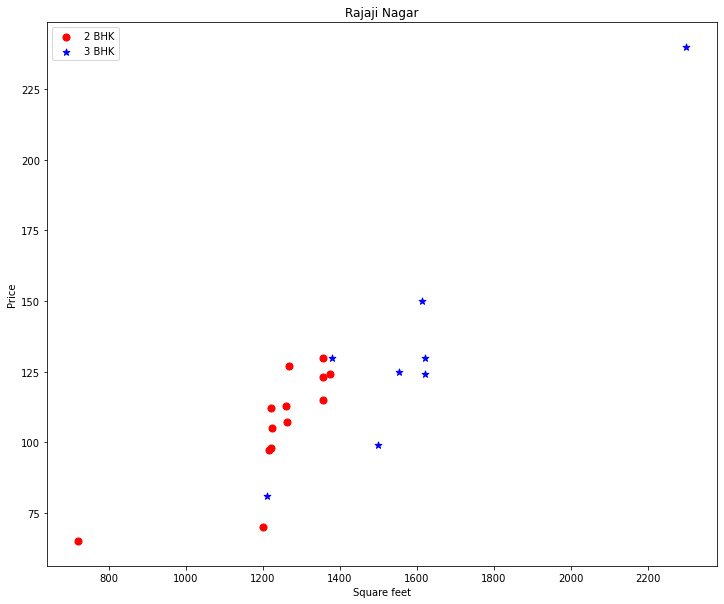

In [360]:
plot_scatter(df4,'Rajaji Nagar')

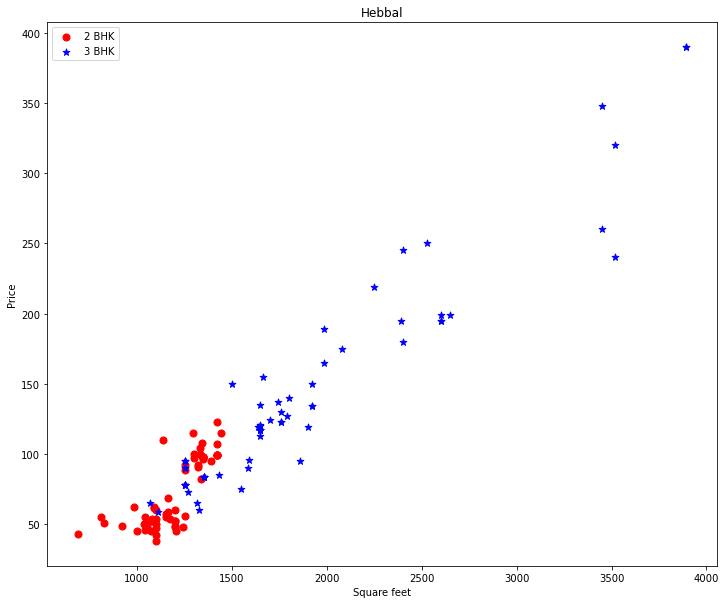

In [361]:
plot_scatter(df4,'Hebbal')

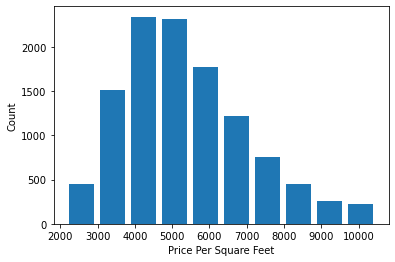

In [366]:
plt.hist(df4['price per sqft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()  

Text(0, 0.5, 'Count')

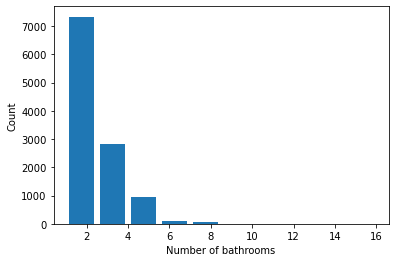

In [369]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [372]:
df4[df4.bath>df4.bhk+2]

,location,bhk,total_sqft,bath,price,price per sqft
2620,other,6,11338.0,9.0,1000.0,8819.897689
7709,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
11366,Nagasandra,4,7000.0,8.0,450.0,6428.571429
12103,Thanisandra,3,1806.0,6.0,116.0,6423.034330


In [374]:
df5=df4[df4.bath<df4.bhk+2]
df5.head()

,location,bhk,total_sqft,bath,price,price per sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [375]:
df5.shape

(11198, 6)

In [376]:
df5.drop('price per sqft',axis=1,inplace=True)

C:\Users\John Joel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [377]:
df5

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,112.00
13315,Whitefield,5,3453.0,4.0,231.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


In [378]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11198 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    11198 non-null  object 
 1   bhk         11198 non-null  int64  
 2   total_sqft  11198 non-null  float64
 3   bath        11198 non-null  float64
 4   price       11198 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 524.9+ KB


In [379]:
df6=pd.get_dummies(df5,drop_la=True)

In [381]:
df6.head(2)

,bhk,total_sqft,bath,price,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2,1056.0,2.0,39.07,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2600.0,5.0,120.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [382]:
df6.shape

(11198, 243)

In [388]:
X=df6.drop('price',axis=1)
Y=df6['price']

In [389]:
X.shape

(11198, 242)

In [390]:
Y.shape

(11198,)

In [395]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [396]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,Y_train)

LinearRegression()

In [398]:
lin.score(X_test,Y_test)

0.8497099051036661

<b>Use K Fold cross validation to measure accuracy of our LinearRegression model

In [410]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# cv=ShuffleSplit(n_splits=6,test_size=0.2,random_state=0)
cross_val_score(lin,X,Y,cv=5)

array([ 8.80930381e-01,  8.02879199e-01,  7.74139317e-01, -6.74219633e+14,
        8.29508810e-01])

In [416]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
model_params={
    'linear regression':{
        'model':LinearRegression(),
        'params':{
            'normalize':[True,False]
    }
},
    'lasso':{
        'model':Lasso(),
        'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
        }
},
    'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

In [417]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
         'best_params': clf.best_params_
    })
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
    

,model,best_score,best_params
0,linear regression,0.820394,{'normalize': True}
1,lasso,0.789164,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.757395,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


<b>
Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [424]:
lin.predict(X_test)[:10]

array([ 68.32508676,  62.8981443 ,  64.39636212,  38.74174215,
        61.54213162,  68.35291382, 185.55182163, 113.67456658,
       147.79134547,  47.3230257 ])

In [423]:
Y_test[:10]

9963      69.23
12344     90.00
686       56.00
8768      23.00
3693      43.59
7904      47.88
10617    255.00
4462     100.00
2909     185.00
10093     55.00
Name: price, dtype: float64

In [425]:
X.columns

Index(['bhk', 'total_sqft', 'bath', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=242)